<a href="https://colab.research.google.com/github/cppel/data/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_6_%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_K_%D0%B1%D0%BB%D0%B8%D0%B6%D0%B0%D0%B9%D1%88%D0%B8%D1%85_%D1%81%D0%BE%D1%81%D0%B5%D0%B4%D0%B5%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *K* ближайших соседей

## [Ссылка на код с пары](https://colab.research.google.com/drive/1VCRO7GkMyCvmQIy1rzWpK1Wtueya1IFo?usp=sharing)

## KNN для классификации

### Получение данных

Будем работать с набором данным `iris` из `sklearn`.

In [15]:
from sklearn.datasets import load_iris
import pandas as pd


data = load_iris()

X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### 1. KNN из sklearn

#### 1.1. Разбейте данные на обучение и тест

In [35]:
# Ваш код здесь
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)




In [36]:
# Пример данных для тренировки
pd.DataFrame(X_train, columns=data['feature_names']).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
96,5.7,2.9,4.2,1.3
105,7.6,3.0,6.6,2.1
66,5.6,3.0,4.5,1.5
0,5.1,3.5,1.4,0.2
122,7.7,2.8,6.7,2.0


In [37]:
pd.DataFrame(X_test, columns=data['feature_names']).head() # Пример данных для теста

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4


#### 1.2. Обучите модель KNN

In [38]:
# Ваш код здесь

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

# Обучим модель
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

#### 1.3. Проверьте качество работы модели

In [39]:
# Ваш код здесь
prediction = knn.predict(X_test)
prediction


array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [40]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2])

In [41]:
from sklearn.metrics import classification_report

report = classification_report(y_test, prediction)
print("Output metric:\n", report)

Output metric:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



#### 1.4. Поэкспериментируйте с количеством соседей

1. Обучите модели с разным кол-вом соседей
2. Посчитайте метрику на тестовой выборке
3. Соберите данные в таблицу/график для наглядности
4. Выберите самое оптимальное значение $k$

     k  accuracy
0    1      0.98
1    2      0.98
2    3      0.98
3    4      0.98
4    5      0.98
5    6      0.98
6    7      0.98
7    8      0.98
8    9      0.98
9   10      0.98
10  11      1.00
11  12      1.00
12  13      1.00
13  14      1.00
14  15      1.00
15  16      1.00
16  17      1.00
17  18      1.00


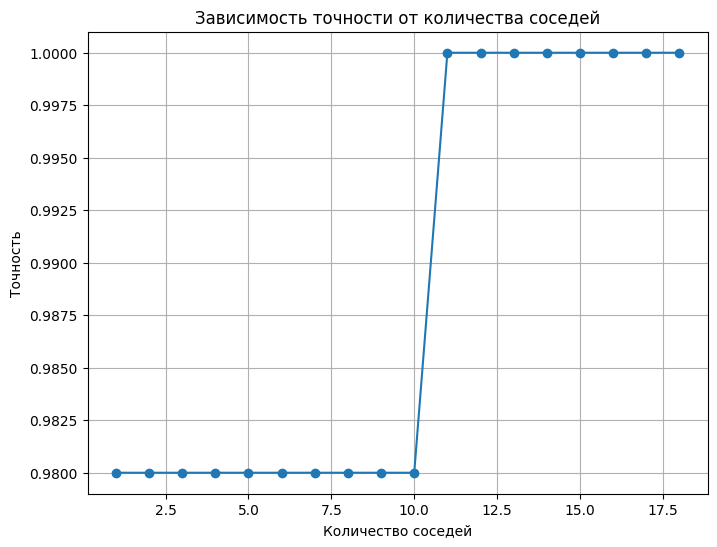

In [42]:
# Ваш код здесь
from sklearn.metrics import accuracy_score

results = []

for k in range(1, 19):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    results.append({'k': k, 'accuracy': accuracy})

results_df = pd.DataFrame(results)

print(results_df)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(results_df['k'], results_df['accuracy'], marker='o')
plt.title("Зависимость точности от количества соседей")
plt.xlabel("Количество соседей")
plt.ylabel("Точность")
plt.grid()
plt.show()

### 2. KNN рукописный

#### 2.1. Возьмите два случайных тестовых объектов

In [46]:
# Ваш код здесь

random_test_samples = X_test.sample(2, random_state=42)
random_test_samples


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
9,4.9,3.1,1.5,0.1
32,5.2,4.1,1.5,0.1


#### 2.2. Посчитайте для каждого расстояния до всех объектов из обучения

In [47]:
# Ваш код здесь
from sklearn.metrics import euclidean_distances


distances = euclidean_distances(random_test_samples, X_train)
distances

array([[3.06757233, 6.10819122, 3.38526218, 0.46904158, 6.21128006,
        2.92232784, 0.4472136 , 0.5       , 0.88317609, 2.45560583,
        4.07062649, 0.51961524, 0.2       , 0.52915026, 3.06267857,
        0.37416574, 3.02489669, 6.30713881, 0.34641016, 3.318132  ,
        4.10609303, 1.26095202, 3.87298335, 4.14366987, 3.01330383,
        3.34962684, 4.67225855, 2.94788059, 1.00995049, 2.16794834,
        4.48218697, 0.26457513, 0.34641016, 2.67207784, 4.24970587,
        0.1       , 4.3760713 , 0.33166248, 0.65574385, 3.8457769 ,
        1.91049732, 5.14684369, 4.07185461, 4.49332839, 5.81807528,
        2.9       , 0.55677644, 0.72801099, 4.02864742, 5.33291665,
        0.31622777, 0.5       , 0.55677644, 3.97994975, 4.91426495,
        0.47958315, 4.86004115, 5.29244745, 0.31622777, 3.66196668,
        3.77094153, 3.94461658, 4.04351332, 4.64112055, 0.74161985,
        4.81767579, 3.20312348, 4.45757782, 2.38746728, 2.77488739,
        3.57071421, 0.93808315, 3.73898382, 3.19

In [50]:
import pandas as pd

distances_df = pd.DataFrame(distances, columns=X_train.index, index=random_test_samples.index)

# расстояния для каждого тестового объекта
sorted_distances1 = distances_df.loc[random_test_samples.index[0]]
sorted_distances2 = distances_df.loc[random_test_samples.index[1]]

In [51]:
distances_df

,96,105,66,0,122,67,28,40,44,60,...,87,74,121,149,20,71,106,14,92,102
9,3.067572,6.108191,3.385262,0.469042,6.211280,2.922328,0.447214,0.50000,0.883176,2.455606,...,3.528456,3.401470,3.968627,4.106093,0.624500,3.036445,3.452535,1.311488,2.918904,5.311309
32,3.228002,6.081118,3.511410,0.624500,6.212085,3.144837,0.714143,0.69282,0.591608,3.043025,...,3.781534,3.487119,4.125530,4.189272,0.761577,3.192178,3.769615,0.685565,3.173326,5.308484


#### 2.3. Выберите топ $k$ соседей для каждого объекта

In [58]:
# Ваш код здесь
k = 5
print(sorted_distances1.sort_values().head(k))
print(sorted_distances2.sort_values().head(k))

34    0.100000
1     0.173205
25    0.200000
49    0.264575
2     0.316228
Name: 9, dtype: float64
33    0.346410
46    0.346410
48    0.424264
5     0.458258
21    0.509902
Name: 32, dtype: float64


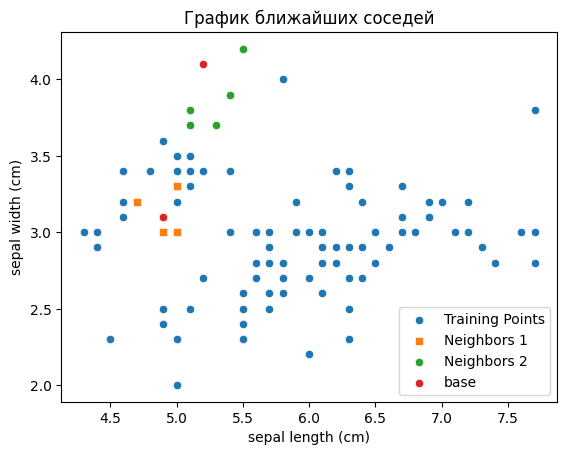

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Индексы ближайших соседей
indices1 = sorted_distances1.sort_values().head(k).index
indices2 = sorted_distances2.sort_values().head(k).index

# Выбор точек из X_train на основе индексов
neighbors1 = X_train.loc[indices1]
neighbors2 = X_train.loc[indices2]

# Создайте scatterplot для точек из X_train
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', data=X_train, label='Training Points')

# Добавьте точки ближайших соседей с разными маркерами
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', data=neighbors1, label='Neighbors 1', marker='s')
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', data=neighbors2, label='Neighbors 2', marker='o')
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', data=random_test_samples, label='base', marker='o')

# Добавьте легенду
plt.legend()
plt.title("График ближайших соседей")
plt.show()

In [60]:
import plotly.express as px

# Создаем трехмерный график
fig = px.scatter_3d(X_train, y='sepal length (cm)', x='sepal width (cm)', z='petal length (cm)', color='petal width (cm)',  size_max=10)

fig.add_trace(px.scatter_3d(neighbors1, y='sepal length (cm)', x='sepal width (cm)', z='petal length (cm)',  size_max=10).data[0])
fig.add_trace(px.scatter_3d(neighbors2, y='sepal length (cm)', x='sepal width (cm)', z='petal length (cm)', size_max=10).data[0])

fig.show()

#### 2.4. Выведите финальное предсказание для двух объектов основываясь на соседях

In [61]:
# Ваш код здесь
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

# Для первого тестового объекта
prediction1 = knn_classifier.predict(X_test.loc[random_test_samples.index[0]].values.reshape(1, -1))

# Для второго тестового объекта
prediction2 = knn_classifier.predict(X_test.loc[random_test_samples.index[1]].values.reshape(1, -1))

print("Предсказание для первого тестового объекта:", prediction1)
print("Предсказание для второго тестового объекта:", prediction2)

Предсказание для первого тестового объекта: [0]
Предсказание для второго тестового объекта: [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



#### 2.5. Сравните с настоящими целевыми значениями этих двух объектов

In [62]:
# Ваш код здесь
object2_index = X_test.index.get_loc(random_test_samples.index[1])
object1_index = X_test.index.get_loc(random_test_samples.index[0])

print("Истинное значение первого тестового объекта:", y_test[object1_index]
)
print("Истинное значение второго тестового объекта:", y_test[object2_index]
)

Истинное значение первого тестового объекта: 0
Истинное значение второго тестового объекта: 0


## KNN для регрессии

### Получение данных


Будем работать с набором данных для задачи регрессии - данные по предсказанию стоимости недвижимости.

In [63]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np


data = fetch_california_housing()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


### KNN из sklearn

#### 3.1. Разбейте данные на обучение и тест

In [64]:
# Ваш код здесь
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

Затем нормализуйте данные:

In [65]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(X_train)

X_train = pd.DataFrame(mms.transform(X_train[X_train.columns]), columns=X_train.columns)
X_test = pd.DataFrame(mms.transform(X_test[X_train.columns]), columns=X_train.columns)

In [66]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.149094,0.352941,0.026022,0.031964,0.057209,0.002230,0.142402,0.614372
1,0.236286,0.215686,0.033052,0.028124,0.028619,0.001764,0.328374,0.667004
2,0.140143,0.745098,0.019404,0.027243,0.073775,0.002117,0.159405,0.610324
3,0.239231,0.274510,0.110359,0.108498,0.017267,0.001318,0.180659,0.757085
4,0.100523,0.450980,0.025040,0.028645,0.058639,0.001624,0.451647,0.457490


In [67]:
X_test.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.270479,0.647059,0.034421,0.029307,0.022116,0.002261,0.197662,0.543522
1,0.393070,0.686275,0.037682,0.026926,0.029404,0.001514,0.514346,0.228745
2,0.665729,0.019608,0.063206,0.031500,0.083502,0.002484,0.116897,0.681174
3,0.417470,0.647059,0.038544,0.029755,0.043895,0.001202,0.170032,0.603239
4,0.313430,0.686275,0.035150,0.026480,0.021807,0.001560,0.134963,0.630567


#### 3.2. Обучите модель KNN


In [68]:
# Ваш код здесь
from sklearn.neighbors import KNeighborsRegressor

k = 5
knn_regressor = KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

#### 3.3. Проверьте качество работы модели

In [69]:
# Ваш код здесь
pred_test = knn_regressor.predict(X_test)
pred_test

array([2.804   , 3.978802, 4.390002, ..., 2.8348  , 2.1006  , 1.4578  ])

In [ ]:
from sklearn.metrics import r2_score # коэффициент детерминации (R2 = 1 - (mse_model / mse_mean) )

'''
Чем меньше средняя квдратичная ошибка, тем R2 больше (ближе к единице), тем выше качество модели.
Если R2 отрицательна, то модель работает хуже, чем простой подсчет среднего.
Если R2 = 0, модель работает так же, как среднее
'''
r2_score(pred_test, y_test)



#### 3.4. Поэкспериментируйте с количеством соседей

1. Обучите модели с разным кол-вом соседей
2. Посчитайте метрику на тестовой выборке
3. Соберите данные в таблицу/график для наглядности
4. Выберите самое оптимальное значение $k$

     k  r2_score
0    1  0.579037
1    2  0.675850
2    3  0.703781
3    4  0.714540
4    5  0.718472
5    6  0.725247
6    7  0.729669
7    8  0.729941
8    9  0.728400
9   10  0.730328
10  11  0.730721
11  12  0.730820
12  13  0.729482
13  14  0.727872
14  15  0.726308
15  16  0.725178
16  17  0.724355
17  18  0.722952
18  19  0.721668
19  20  0.720998


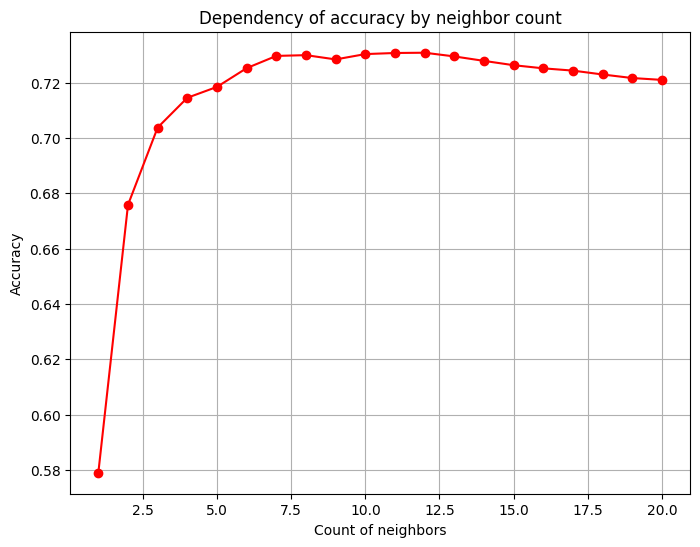

The most optimal value of neighbors: 12


In [71]:
# Ваш код здесь
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
results = []

for k in range(1, 21):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    accuracy = r2_score(y_test, y_pred)
    results.append({'k': k, 'r2_score': accuracy})

results_df = pd.DataFrame(results)

print(results_df)


plt.figure(figsize=(8, 6))
plt.plot(results_df['k'], results_df['r2_score'], color='red', marker='o')
plt.title("Dependency of accuracy by neighbor count")
plt.xlabel("Count of neighbors")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

max_r2_row = results_df[results_df['r2_score'] == results_df['r2_score'].max()]
max_k = max_r2_row['k'].values[0]

print('The most optimal value of neighbors:', max_k)

### 4. KNN рукописный

#### 4.1. Возьмите два случайных тестовых объектов

In [72]:
# Ваш код здесь
random_test_samples = X_test.sample(2, random_state=32)
random_test_samples

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
898,0.154315,0.803922,0.029363,0.031822,0.087398,0.001896,0.592986,0.210526
3385,0.219418,0.823529,0.039147,0.030682,0.019229,0.001239,0.256111,0.396761


#### 4.2. Посчитайте для каждого расстояния до всех объектов из обучения

In [73]:
# Ваш код здесь
from sklearn.metrics import euclidean_distances


distances = euclidean_distances(random_test_samples, X_train)
distances

array([[0.75528227, 0.79662653, 0.59312534, ..., 0.24615083, 0.61479326,
        0.81054077],
       [0.53693618, 0.66943501, 0.26603509, ..., 0.37424061, 0.30546354,
        0.49599184]])

In [76]:
# Ваш код здесь
import pandas as pd

distances_df = pd.DataFrame(distances, columns=X_train.index, index=random_test_samples.index)

# расстояния для каждого тестового объекта
sorted_distances1 = distances_df.loc[random_test_samples.index[0]]
sorted_distances2 = distances_df.loc[random_test_samples.index[1]]

In [77]:
distances_df

,0,1,2,3,4,5,6,7,8,9,...,16502,16503,16504,16505,16506,16507,16508,16509,16510,16511
898,0.755282,0.796627,0.593125,0.879537,0.457476,0.379273,0.697298,0.628577,0.583697,0.750481,...,0.669355,0.650676,0.556749,0.149464,0.598769,0.152774,0.744574,0.246151,0.614793,0.810541
3385,0.536936,0.669435,0.266035,0.669680,0.443405,0.573398,0.430486,0.294093,0.257848,0.523498,...,0.326108,0.551367,0.714176,0.475702,0.252505,0.271298,0.568077,0.374241,0.305464,0.495992


#### 4.3. Выберите топ $k$ соседей для каждого объекта

In [78]:
k = 12
print(sorted_distances1.sort_values().head(k))
print(sorted_distances2.sort_values().head(k))

7694     0.040169
14585    0.049002
2184     0.052253
3046     0.052970
7041     0.054330
11198    0.054563
11207    0.055694
5933     0.056425
2921     0.057936
14244    0.062739
2353     0.062992
7007     0.063409
Name: 898, dtype: float64
9330     0.064949
4616     0.096229
6286     0.101082
15311    0.107543
878      0.109168
3900     0.109236
15285    0.109236
10125    0.112031
5574     0.114860
8823     0.116071
9842     0.116595
3722     0.118880
Name: 3385, dtype: float64


#### 4.4. Выведите финальное предсказание для двух объектов основываясь на соседях

In [79]:
# Ваш код здесь
knn_classifier = KNeighborsRegressor(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

# Для первого тестового объекта
prediction1 = knn_classifier.predict(X_test.loc[random_test_samples.index[0]].values.reshape(1, -1))

# Для второго тестового объекта
prediction2 = knn_classifier.predict(X_test.loc[random_test_samples.index[1]].values.reshape(1, -1))

print("Pred for test 1:", prediction1)
print("Pred for test 2:", prediction2)

Pred for test 1: [1.9515]
Pred for test 2: [2.34441667]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names



#### 4.5. Сравните с настоящими целевыми значениями этих двух объектов

In [80]:
# Ваш код здесь
object2_index = X_test.index.get_loc(random_test_samples.index[1])
object1_index = X_test.index.get_loc(random_test_samples.index[0])

print("True value for first test object:", y_test[object1_index])
print("True value for second test object:", y_test[object2_index])

True value for first test object: 1.2
True value for second test object: 1.818


В итоге, конечные значения отличаются от истинных, но не сильно.

# Weighted KNN

## KNN для классификации

### Получение данных

Будем работать с набором данным `iris` из `sklearn`.

In [82]:
from sklearn.datasets import load_iris
import pandas as pd


data = load_iris()

X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [83]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Выберите только 0 и 3 признак (sepal length (cm) и petal width (cm))

In [84]:
# Ваш код здесь
selected_features = pd.DataFrame(X.iloc[:, [0, 3]])
selected_features

,sepal length (cm),petal width (cm)
0,5.1,0.2
1,4.9,0.2
2,4.7,0.2
3,4.6,0.2
4,5.0,0.2
...,...,...
145,6.7,2.3
146,6.3,1.9
147,6.5,2.0
148,6.2,2.3


### Визуализируйте ваши данные на графике

Text(0.5, 1.0, 'Scatter Plot of Sepal Length and Petal Width')

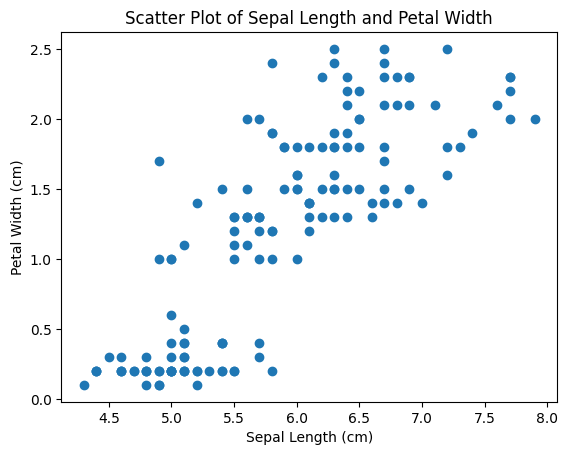

In [85]:
# Ваш код здесь
import matplotlib.pyplot as plt

plt.scatter(selected_features['sepal length (cm)'],selected_features['petal width (cm)'])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Scatter Plot of Sepal Length and Petal Width')

### 1. KNN из sklearn

#### 1.1. Разбейте данные на обучение и тест

In [86]:
# Ваш код здесь
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

#### 1.2. Обучите модель KNN на 50 соседях

In [87]:
# Ваш код здесь
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)

# Обучим модель
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50)

#### 1.3. Проверьте качество работы модели

In [88]:
# Ваш код здесь
prediction = knn.predict(X_test)
prediction

array([1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 1, 2, 2, 1,
       0, 2, 2, 2, 1, 1, 1, 2])

In [89]:
y_test

array([1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 1, 1, 2, 1,
       0, 2, 1, 2, 1, 1, 1, 2])

In [90]:
from sklearn.metrics import classification_report

report = classification_report(y_test, prediction)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.83      0.91        12
           2       0.82      1.00      0.90         9

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.95      0.93      0.93        30



#### 1.4. Возьмите один случайный тестовый объект и посчитайте для него расстояния до всех объектов с обучения

In [91]:
# Ваш код здесь
random_test_sample = X_test.sample(1, random_state=50)
random_test_sample

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
48,5.3,3.7,1.5,0.2


In [92]:
from sklearn.metrics import euclidean_distances


distances = euclidean_distances(random_test_sample, X_train)
distances

array([[5.16430053, 2.13072758, 3.56230263, 5.0049975 , 0.28284271,
        0.92195445, 2.86530976, 4.08411557, 3.34514574, 0.42426407,
        1.62788206, 2.39374184, 4.94165964, 1.2083046 , 5.16720427,
        0.31622777, 1.04880885, 0.46904158, 4.19285106, 4.34281015,
        3.46842904, 0.36055513, 0.83066239, 3.6       , 4.13521463,
        2.98998328, 3.84967531, 0.2236068 , 1.15758369, 6.07042008,
        6.06712452, 3.3015148 , 4.58366665, 0.42426407, 0.43588989,
        4.52658812, 3.43802269, 0.33166248, 3.0757113 , 0.5       ,
        5.49909083, 4.48664685, 3.48855271, 4.73708771, 2.84604989,
        0.8660254 , 3.54682957, 0.42426407, 2.98998328, 4.02119385,
        0.78740079, 0.72801099, 3.13528308, 0.81240384, 4.05092582,
        0.87177979, 3.26496554, 3.90512484, 4.95479566, 5.64092191,
        3.62629287, 4.01497198, 0.34641016, 4.13521463, 1.28840987,
        3.10322413, 0.24494897, 4.76864761, 0.70710678, 0.33166248,
        3.79868398, 4.04598566, 4.98598034, 4.83

#### 1.5. Выберите топ  k  соседей


In [93]:
# Ваш код здесь
distances_df = pd.DataFrame(distances, columns=X_train.index, index=random_test_sample.index)
sorted_distances = distances_df.loc[random_test_sample.index[0]].sort_values()

k = 7
print(sorted_distances.head(k))

10    0.100000
27    0.223607
46    0.244949
19    0.244949
21    0.282843
0     0.300000
17    0.316228
Name: 48, dtype: float64


In [95]:
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

#### 1.6. Выведите финальное предсказание для этого объекта

In [96]:
prediction = knn_classifier.predict(X_test.loc[random_test_sample.index[0]].values.reshape(1, -1))
print('Predicted value:',prediction)

Predicted value: [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



#### 1.7. Сравните с настоящим целевым значением и предсказанием модели из `sklearn`

In [97]:
# Ваш код здесь
indx = X_test.index.get_loc(random_test_sample.index[0])

In [98]:
# Ваш код здесь
print("Истинное значение:", y_test[indx])

Истинное значение: 0


#### 1.8 Визуализируйте точки с обучения и тестовую с отрисовкой ближайших соседей

In [99]:
# Ваш код здесь
X_train.loc[sorted_distances.head(k).index]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
10,5.4,3.7,1.5,0.2
27,5.2,3.5,1.5,0.2
46,5.1,3.8,1.6,0.2
19,5.1,3.8,1.5,0.3
21,5.1,3.7,1.5,0.4
0,5.1,3.5,1.4,0.2
17,5.1,3.5,1.4,0.3


In [100]:
random_test_sample

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
48,5.3,3.7,1.5,0.2


Text(0.5, 1.0, 'Scatter Plot of Sepal Length and Petal Width')

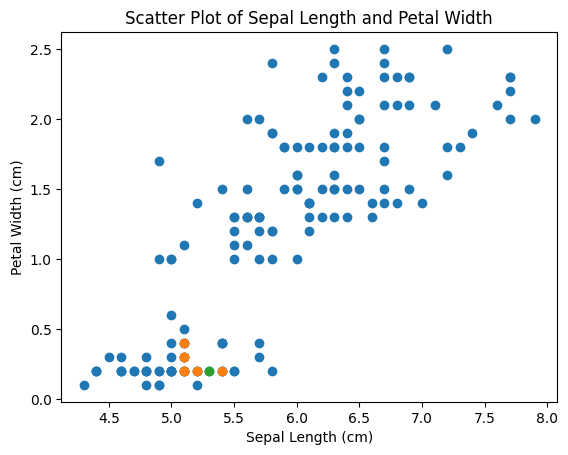

In [101]:
plt.scatter(selected_features['sepal length (cm)'],selected_features['petal width (cm)'])
plt.scatter(X_train.loc[sorted_distances.head(k).index]['sepal length (cm)'],
            X_train.loc[sorted_distances.head(k).index]['petal width (cm)'])
plt.scatter(random_test_sample['sepal length (cm)'],random_test_sample['petal width (cm)'])

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Scatter Plot of Sepal Length and Petal Width')

In [105]:
import plotly.express as px

# Создаем трехмерный график
fig = px.scatter_3d(X_train, y='sepal length (cm)', x='sepal width (cm)', z='petal length (cm)', color='petal width (cm)',  size_max=10)

fig.add_trace(px.scatter_3d(X_train.loc[sorted_distances.head(k).index], y='sepal length (cm)', x='sepal width (cm)', z='petal length (cm)',  size_max=10).data[0])
fig.add_trace(px.scatter_3d(random_test_sample, y='sepal length (cm)', x='sepal width (cm)', z='petal length (cm)').data[0])
fig.show()

### 2. Weighted KNN

#### 2.1. Обучите модель "взвешенный KNN" по дистанции

In [106]:
# Ваш код здесь
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')

knn.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

#### 2.2. Проверьте качество работы модели


In [107]:
# Ваш код здесь

y_pred = knn.predict(X_test)
y_pred

array([1, 2, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 1, 2, 2, 1,
       0, 2, 1, 2, 1, 1, 1, 2])

In [108]:

y_test

array([1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 1, 1, 2, 1,
       0, 2, 1, 2, 1, 1, 1, 2])

In [109]:

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9333333333333333


#### 2.3. Возьмите тот же случайный тестовый объект и посчитайте для него расстояния до всех объектов с обучения

In [110]:
# Ваш код здесь
from sklearn.metrics import euclidean_distances


distances = euclidean_distances(random_test_sample, X_train)
distances

array([[5.16430053, 2.13072758, 3.56230263, 5.0049975 , 0.28284271,
        0.92195445, 2.86530976, 4.08411557, 3.34514574, 0.42426407,
        1.62788206, 2.39374184, 4.94165964, 1.2083046 , 5.16720427,
        0.31622777, 1.04880885, 0.46904158, 4.19285106, 4.34281015,
        3.46842904, 0.36055513, 0.83066239, 3.6       , 4.13521463,
        2.98998328, 3.84967531, 0.2236068 , 1.15758369, 6.07042008,
        6.06712452, 3.3015148 , 4.58366665, 0.42426407, 0.43588989,
        4.52658812, 3.43802269, 0.33166248, 3.0757113 , 0.5       ,
        5.49909083, 4.48664685, 3.48855271, 4.73708771, 2.84604989,
        0.8660254 , 3.54682957, 0.42426407, 2.98998328, 4.02119385,
        0.78740079, 0.72801099, 3.13528308, 0.81240384, 4.05092582,
        0.87177979, 3.26496554, 3.90512484, 4.95479566, 5.64092191,
        3.62629287, 4.01497198, 0.34641016, 4.13521463, 1.28840987,
        3.10322413, 0.24494897, 4.76864761, 0.70710678, 0.33166248,
        3.79868398, 4.04598566, 4.98598034, 4.83

#### 2.4. Выберите топ  k  соседей


In [111]:
# Ваш код здесь
distances_df = pd.DataFrame(distances, columns=X_train.index, index=random_test_sample.index)
sorted_distances = distances_df.loc[random_test_sample.index[0]].sort_values()[::-1]

k = 5
print(sorted_distances.head(k))

122    6.070420
117    6.067125
105    5.949790
135    5.640922
107    5.499091
Name: 48, dtype: float64


#### 2.5. Рассчитайте вес для каждого соседа

In [112]:
# Ваш код здесь
knn_classifier = KNeighborsClassifier(n_neighbors=k, weights='distance')
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

#### 2.6. Выведите финальное предсказание для этого объекта

In [113]:
# Ваш код здесь
y_pred = knn_classifier.predict(X_test)
y_pred

array([1, 2, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 1, 2, 2, 1,
       0, 2, 1, 2, 1, 1, 1, 2])

#### 2.7. Сравните с настоящим целевым значением и предсказанием модели из `sklearn`

In [114]:
# Ваш код здесь
y_test

array([1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 1, 1, 2, 1,
       0, 2, 1, 2, 1, 1, 1, 2])

In [115]:
# Ваш код здесь

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9333333333333333


#### 2.8. Визуализируйте точки с обучения и тестовую с отрисовкой ближайших соседей по удаленности

Text(0.5, 1.0, 'Scatter Plot of Sepal Length and Petal Width')

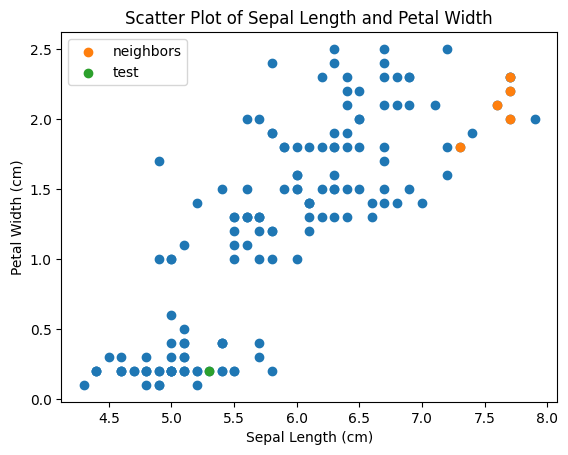

In [116]:
# Ваш код здесь

plt.scatter(selected_features['sepal length (cm)'],selected_features['petal width (cm)'])
plt.scatter(X_train.loc[sorted_distances.head(k).index]['sepal length (cm)'],
            X_train.loc[sorted_distances.head(k).index]['petal width (cm)'],label = 'neighbors')
plt.scatter(random_test_sample['sepal length (cm)'],random_test_sample['petal width (cm)'],label = 'test')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.title('Scatter Plot of Sepal Length and Petal Width')

## 3. Еще одна задача классификации

### Получение данных

Будем работать с набором данным `fetch_olivetti_faces` из `sklearn`.

In [117]:
from sklearn.datasets import fetch_olivetti_faces
import pandas as pd


data = fetch_olivetti_faces(shuffle=True, random_state=9)

X = pd.DataFrame(data['data'])
y = data['target']

X.head()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.723140,0.710744,0.714876,0.731405,0.735537,0.752066,0.772727,0.793388,0.814050,0.834711,...,0.793388,0.904959,0.549587,0.409091,0.491736,0.487603,0.471074,0.483471,0.475207,0.475207
1,0.289256,0.157025,0.148760,0.190083,0.169421,0.194215,0.404959,0.607438,0.669421,0.677686,...,0.438017,0.400826,0.421488,0.429752,0.433884,0.425620,0.438017,0.438017,0.210744,0.206612
2,0.586777,0.595041,0.681818,0.694215,0.714876,0.698347,0.714876,0.727273,0.743802,0.739669,...,0.495868,0.380165,0.400826,0.330579,0.148760,0.119835,0.123967,0.115702,0.119835,0.107438
3,0.235537,0.351240,0.479339,0.545455,0.566116,0.566116,0.595041,0.607438,0.619835,0.623967,...,0.169421,0.198347,0.202479,0.214876,0.202479,0.214876,0.214876,0.214876,0.210744,0.206612
4,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.074380,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893


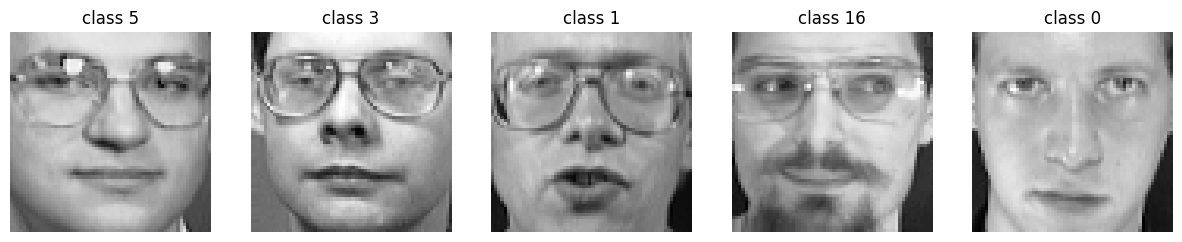

In [118]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 5, figsize=(15, 8))

for i in range(0, 5):
    ax[i].imshow(X.iloc[i].values.reshape((64, 64)), cmap='gray')
    ax[i].axis('off')
    ax[i].set_title(f'class {y[i]}')

plt.show()

In [119]:
y

array([ 5,  3,  1, 16,  0,  1, 12,  9, 26, 37, 20,  5, 10, 27, 10, 34, 13,
       26, 17, 31,  9,  7, 31, 37, 31, 35, 18, 29, 29,  4, 21, 20, 23,  7,
        9, 18, 22,  2,  1, 39, 36,  8, 34, 32,  3, 20,  3,  9, 37, 32, 34,
       15,  9, 16, 36, 16, 13,  7, 29,  6, 13,  4, 16,  0,  8,  1, 25,  3,
       18, 29,  8, 35,  2, 25, 21, 31, 35, 23, 30, 28,  4, 10, 11, 27, 29,
       39,  5, 12, 29, 26, 15,  2, 39,  6, 30, 37, 25, 32, 35, 24, 15, 24,
        2, 19, 22,  0, 38,  5, 22, 28,  6, 38,  6,  3, 33, 12, 36,  8, 27,
       19, 25, 36, 10, 37,  9, 33, 10, 28, 32, 34, 17, 23, 19, 24, 27,  3,
       39, 30,  3,  7,  3, 30, 12, 21, 17, 14, 35, 21, 19,  5, 32, 16, 19,
        8, 33, 14, 17, 15, 22, 38, 15, 18,  7, 14, 28, 39, 23, 36, 28, 10,
       39, 36, 37, 10, 34, 25, 18, 13, 19, 33, 33, 13, 26,  9, 13, 34, 24,
        0, 30, 23,  2, 22,  9, 11,  7, 35, 19, 26, 32, 11,  7,  7,  0,  4,
        0,  2,  0, 26, 21, 14,  4, 32,  1, 23, 16,  0,  7, 14, 16, 15, 39,
       17, 33, 30, 37, 17

### 3.1. KNN из sklearn

#### 3.1.1. Разбейте данные на обучение и тест

In [120]:
# Ваш код здесь
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 3.1.2. Обучите модель KNN на 50 соседях

In [121]:
# Ваш код здесь
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)

# Обучим модель
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50)

#### 3.1.3. Проверьте качество работы модели


In [122]:
# Ваш код здесь

prediction = knn.predict(X_test)
prediction

array([14, 26, 15, 24, 17,  8, 17, 29, 29, 10, 24, 18, 13, 24, 29, 29,  8,
       33, 17, 37, 23, 24,  5, 26, 15, 15, 33, 17, 17, 24, 24,  8, 28,  7,
       24, 36, 17, 33, 22, 14, 26, 24,  6,  4,  4, 14,  4, 13, 26, 10, 14,
       14,  8,  8, 12,  8, 14,  4, 33, 14,  9, 32, 22, 29, 24, 29, 17, 14,
       24, 13, 20, 14, 14, 28, 24,  8,  7, 29, 10,  8])

In [123]:
y_test

array([14, 11,  7,  4,  6, 29, 17, 30, 29, 10, 37, 18, 13,  2, 19, 34,  8,
       21, 25, 34, 23, 34,  5,  1,  5,  5, 33, 17,  2, 22, 25, 11, 28,  7,
        5, 36,  3, 21, 22, 30, 31, 16, 35, 35, 11, 18, 19, 13, 31, 10,  3,
        1, 11,  8, 12, 39, 30, 37, 21, 19,  9, 38,  2, 30, 24, 20, 12, 30,
       12, 25, 20,  3,  1, 20, 24, 11,  7, 20, 18, 11])

In [124]:

from sklearn.metrics import classification_report

report = classification_report(y_test, prediction)
print(report)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1
           5       1.00      0.25      0.40         4
           6       0.00      0.00      0.00         1
           7       1.00      0.67      0.80         3
           8       0.25      1.00      0.40         2
           9       1.00      1.00      1.00         1
          10       0.67      1.00      0.80         2
          11       0.00      0.00      0.00         6
          12       1.00      0.33      0.50         3
          13       0.67      1.00      0.80         2
          14       0.10      1.00      0.18         1
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         1
          17       0.29      1.00      0.44         2
          18       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to cont

### 3.2. Weighted KNN

#### 3.2.1. Обучите модель взвешенный KNN по дистанции

In [125]:
# Ваш код здесь

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50,weights='distance' )

# Обучим модель
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50, weights='distance')

#### 3.2.2. Проверьте качество работы модели


In [126]:
# Ваш код здесь

y_pred = knn.predict(X_test)
y_pred

array([14, 26,  7, 24,  6, 29, 17, 29, 29, 10, 37, 18, 13, 24, 29, 29,  8,
       21, 17, 37, 23, 24,  5,  1,  5,  5, 33, 17, 22, 22, 25,  8, 28,  7,
        5, 36, 17, 21, 22, 14, 31, 25, 35, 35, 39, 14,  4, 13, 26, 10, 14,
       14,  8,  8, 12,  8, 14,  4, 38, 29,  9, 38, 22, 30, 24, 29, 17, 14,
       24, 24, 20, 14,  1, 20, 24,  8,  7, 29, 10,  8])

In [127]:

y_test

array([14, 11,  7,  4,  6, 29, 17, 30, 29, 10, 37, 18, 13,  2, 19, 34,  8,
       21, 25, 34, 23, 34,  5,  1,  5,  5, 33, 17,  2, 22, 25, 11, 28,  7,
        5, 36,  3, 21, 22, 30, 31, 16, 35, 35, 11, 18, 19, 13, 31, 10,  3,
        1, 11,  8, 12, 39, 30, 37, 21, 19,  9, 38,  2, 30, 24, 20, 12, 30,
       12, 25, 20,  3,  1, 20, 24, 11,  7, 20, 18, 11])

In [128]:

report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           1       1.00      0.67      0.80         3
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         3
           8       0.29      1.00      0.44         2
           9       1.00      1.00      1.00         1
          10       0.67      1.00      0.80         2
          11       0.00      0.00      0.00         6
          12       1.00      0.33      0.50         3
          13       1.00      1.00      1.00         2
          14       0.12      1.00      0.22         1
          16       0.00      0.00      0.00         1
          17       0.40      1.00      0.57         2
          18       1.00      0.33      0.50         3
          19       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to cont

### 3.3. Custom Weighted KNN

#### 3.3.1. Напишите свою функцию подсчета весов по дистанции

(Можете выбрать любой подход)

In [129]:
# Ваш код здесь
def calculate_distance_weights(distances):

    distances = np.where(distances == 0, 1e-6, distances)

    weights = 1.0 / distances

    return weights

#### 3.3.2. Обучите модель взвешенный KNN по написанной функции выше

In [130]:
# Ваш код здесь

knn = KNeighborsClassifier(n_neighbors=5, weights=calculate_distance_weights)

knn.fit(X_train, y_train)

KNeighborsClassifier(weights=<function calculate_distance_weights at 0x7c88315eb640>)

#### 3.3.3. Проверьте качество работы модели


In [131]:
# Ваш код здесь
y_pred = knn.predict(X_test)
y_pred

array([14, 12,  7,  4,  6, 29, 17, 30, 29, 10, 37, 18, 13,  2, 14, 29,  8,
       21, 22, 34, 23, 34,  5,  1,  5,  5, 33, 17, 22, 22, 25, 17, 28,  7,
        5, 36, 22, 21, 22, 30, 31, 24,  6, 35, 11, 18, 19, 13, 31, 10, 22,
        1, 39,  8, 12, 39, 30, 37, 21, 19,  9, 38, 12, 30, 24, 20, 12, 30,
       14, 25, 20, 14,  1, 20, 24, 39,  7, 20, 18, 11])

In [132]:
y_test

array([14, 11,  7,  4,  6, 29, 17, 30, 29, 10, 37, 18, 13,  2, 19, 34,  8,
       21, 25, 34, 23, 34,  5,  1,  5,  5, 33, 17,  2, 22, 25, 11, 28,  7,
        5, 36,  3, 21, 22, 30, 31, 16, 35, 35, 11, 18, 19, 13, 31, 10,  3,
        1, 11,  8, 12, 39, 30, 37, 21, 19,  9, 38,  2, 30, 24, 20, 12, 30,
       12, 25, 20,  3,  1, 20, 24, 11,  7, 20, 18, 11])

In [133]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8125


## KNN для регрессии

### Получение данных


Будем работать с набором данных для задачи регрессии - данные по предсказанию стоимости недвижимости.

In [134]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np


data = fetch_california_housing()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [135]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

### Возьмите только признак MedInc и 1000 первых строк

In [136]:
# Ваш код здесь
selected_features = pd.DataFrame(X.iloc[:, 0])[:1000]
y_selected = pd.DataFrame(y[:1000])

In [137]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(selected_features,y_selected)

### Отрисуйте данные на графике

Text(0.5, 0, 'Value "MedInc"')

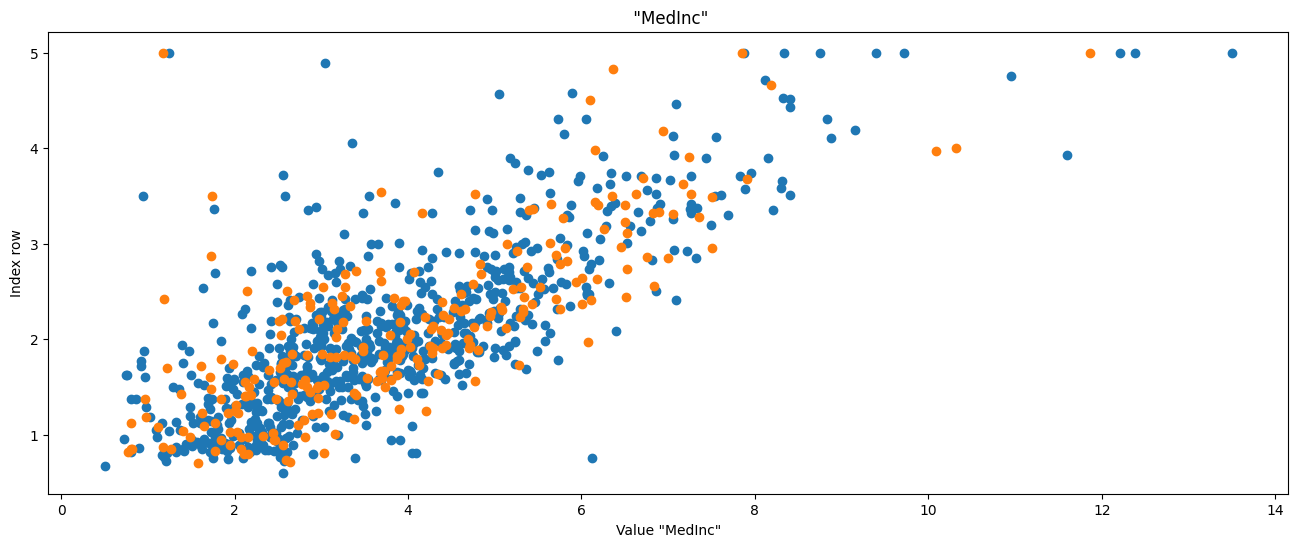

In [138]:
# Ваш код здесь
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
plt.scatter(X_train,y_train)
plt.scatter(X_test,y_test)

plt.title(' "MedInc"')
plt.ylabel('Index row')
plt.xlabel('Value "MedInc"')

### 4. KNN из sklearn

#### 4.1. Разбейте данные на обучение и тест

In [139]:
# Ваш код здесь

selected_features = pd.DataFrame(X.iloc[:, 0])[:1000]
y_selected = pd.DataFrame(y[:1000])

#### 4.2. Обучите модель KNN на 100 соседях


In [140]:
# Ваш код здесь

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(selected_features,y_selected, random_state=14)

#### 4.3. Проверьте качество работы модели


In [141]:
# Ваш код здесь
from sklearn.neighbors import KNeighborsRegressor

knn_regressor = KNeighborsRegressor(n_neighbors=100)

# Обучим модель
knn_regressor.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=100)

In [142]:
pred_test = knn_regressor.predict(X_test)

In [143]:

from sklearn.metrics import r2_score #коэффициент детерминации (R2 = 1 - (mse_model / mse_mean) )
'''
Чем меньше средняя квдратичная ошибка, тем R2 больше (ближе к единице), тем выше качество модели.
Если R2 отрицательна, то модель работает хуже, чем простой подсчет среднего.
Если R2 = 0, модель работает так же, как среднее
'''
r2_score(pred_test, y_test)

-0.039458014109299056

#### 4.4. Возьмите один случайный тестовый объект и посчитайте для него расстояния до всех объектов с обучения

In [144]:
# Ваш код здесь
from random import randint
random_test_sample = X_test.sample(1, random_state=42)
random_test_sample

,MedInc
776,4.6635


In [145]:
from sklearn.metrics import euclidean_distances

distances = euclidean_distances(random_test_sample, X_train)

#### 4.5. Выберите топ  k  соседей


In [146]:
# Ваш код здесь

distances_df = pd.DataFrame(distances, columns=X_train.index, index=random_test_sample.index)
sorted_distances = distances_df.loc[random_test_sample.index[0]].sort_values()

k = 50
neighbors = sorted_distances.head(k)

print(neighbors)

355    0.0061
233    0.0072
587    0.0135
853    0.0151
830    0.0177
578    0.0285
884    0.0286
875    0.0343
827    0.0384
837    0.0385
847    0.0424
801    0.0448
807    0.0474
899    0.0500
769    0.0508
567    0.0541
521    0.0553
613    0.0593
598    0.0630
902    0.0635
820    0.0722
997    0.0726
412    0.0742
273    0.0742
661    0.0776
227    0.0805
391    0.0811
921    0.0843
900    0.0865
851    0.0914
675    0.0974
574    0.1060
291    0.1073
153    0.1073
634    0.1082
223    0.1086
550    0.1143
703    0.1178
149    0.1207
775    0.1218
738    0.1298
915    0.1318
781    0.1354
394    0.1367
610    0.1401
883    0.1417
739    0.1490
937    0.1579
595    0.1602
842    0.1615
Name: 776, dtype: float64


In [147]:
knn_regressor = KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=50)

#### 4.6. Выведите финальное предсказание для этого объекта

In [148]:
# Ваш код здесь
prediction = knn_regressor.predict(X_test.loc[random_test_sample.index[0]].values.reshape(1, -1))

print('Предсказанное значение:',prediction)

Предсказанное значение: [[2.21096]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names



#### 4.7. Сравните с настоящим целевым значением и предсказанием модели из `sklearn`

In [149]:
# Ваш код здесь

print("Истинное значение:", y_test.loc[random_test_sample.index[0]])

Истинное значение: 0    2.067
Name: 776, dtype: float64


#### 4.8 Визуализируйте точки с обучения и тестовую с отрисовкой ближайших соседей

Text(0, 0.5, 'Предсказание Цены')

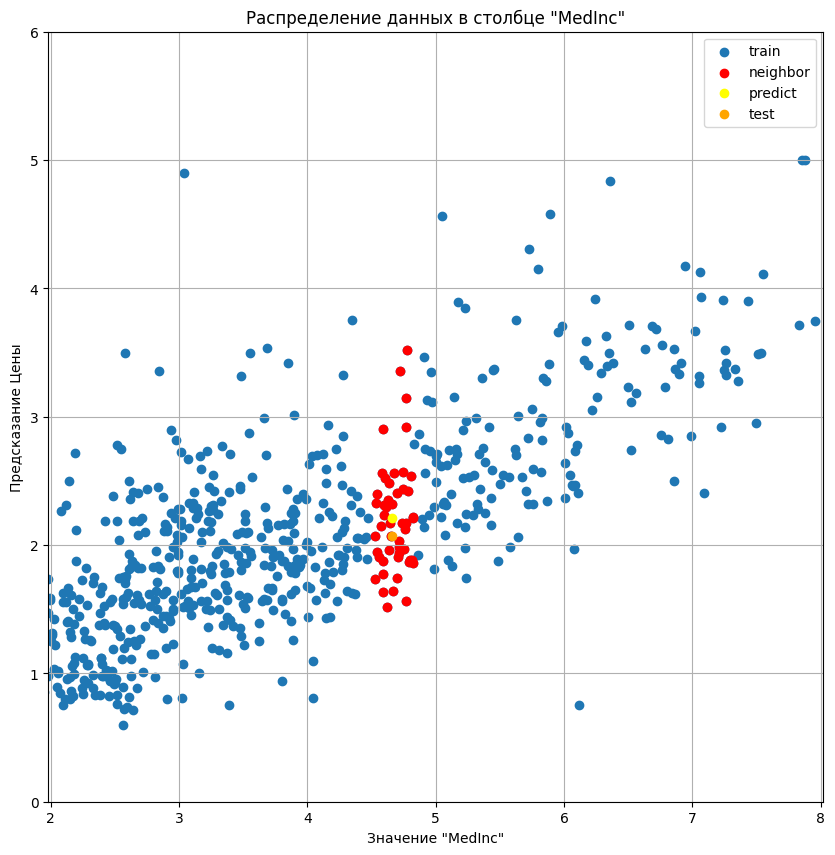

In [150]:
# Ваш код здесь
# Ваш код здесь
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.scatter(X_train, y_train, label ='train')
plt.scatter(X_train.loc[neighbors.index],y_train.loc[neighbors.index],
            color = 'red' , label = 'neighbor')
plt.scatter(X_test.loc[random_test_sample.index[0]],prediction, color= 'yellow', label = 'predict')
plt.scatter(X_test.loc[random_test_sample.index[0]],y_test.loc[random_test_sample.index[0]], color= 'orange', label = 'test')

plt.axis( 'equal')
plt.title('Распределение данных в столбце "MedInc"')
plt.legend()
plt.axis([4, 6, 0, 6])
plt.grid()
plt.xlabel('Значение "MedInc"')
plt.ylabel('Предсказание Цены')

### 5. Weighted KNN

#### 5.1. Обучите модель взвешенный KNN по дистанции

In [151]:
# Ваш код здесь
selected_features = pd.DataFrame(X.iloc[:, 0])[:1000]
y_selected = pd.DataFrame(y[:1000])

In [152]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(selected_features,y_selected, random_state=14)

In [153]:

from sklearn.neighbors import KNeighborsRegressor

knn_regressor = KNeighborsRegressor(n_neighbors=100, weights='distance')

# Обучим модель
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=100, weights='distance')

#### 5.2. Проверьте качество работы модели


In [154]:
# Ваш код здесь

pred_test = knn_regressor.predict(X_test)


In [155]:
from sklearn.metrics import r2_score #коэффициент детерминации (R2 = 1 - (mse_model / mse_mean) )
'''
Чем меньше средняя квдратичная ошибка, тем R2 больше (ближе к единице), тем выше качество модели.
Если R2 отрицательна, то модель работает хуже, чем простой подсчет среднего.
Если R2 = 0, модель работает так же, как среднее
'''
r2_score(pred_test, y_test)

0.13495955874615773

#### 5.3. Возьмите тот же случайный тестовый объект и посчитайте для него расстояния до всех объектов с обучения

In [156]:
# Ваш код здесь
from random import randint
random_test_sample = X_test.sample(1, random_state=42)
random_test_sample

,MedInc
776,4.6635


In [157]:

from sklearn.metrics import euclidean_distances

distances = euclidean_distances(random_test_sample, X_train)

#### 5.4. Выберите топ  k  соседей


In [158]:
# Ваш код здесь
distances_df = pd.DataFrame(distances, columns=X_train.index, index=random_test_sample.index)
sorted_distances = distances_df.loc[random_test_sample.index[0]].sort_values()

k = 50
neighbors = sorted_distances.head(k)

print(neighbors)

355    0.0061
233    0.0072
587    0.0135
853    0.0151
830    0.0177
578    0.0285
884    0.0286
875    0.0343
827    0.0384
837    0.0385
847    0.0424
801    0.0448
807    0.0474
899    0.0500
769    0.0508
567    0.0541
521    0.0553
613    0.0593
598    0.0630
902    0.0635
820    0.0722
997    0.0726
412    0.0742
273    0.0742
661    0.0776
227    0.0805
391    0.0811
921    0.0843
900    0.0865
851    0.0914
675    0.0974
574    0.1060
291    0.1073
153    0.1073
634    0.1082
223    0.1086
550    0.1143
703    0.1178
149    0.1207
775    0.1218
738    0.1298
915    0.1318
781    0.1354
394    0.1367
610    0.1401
883    0.1417
739    0.1490
937    0.1579
595    0.1602
842    0.1615
Name: 776, dtype: float64


#### 5.5. Рассчитайте вес для каждого соседа

In [159]:
# Ваш код здесь
def calculate_distance_weights(distances):

    distances = np.where(distances == 0, 1e-6, distances)

    weights = 1.0 / distances

    return weights

In [160]:

knn = KNeighborsRegressor(n_neighbors=k, weights=calculate_distance_weights)

knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=50,
                    weights=<function calculate_distance_weights at 0x7c882fc34af0>)

#### 5.6. Выведите финальное предсказание для этого объекта

In [161]:
# Ваш код здесь

prediction = knn.predict(X_test.loc[random_test_sample.index[0]].values.reshape(1, -1))
print('Предсказанное значение:',prediction)


Предсказанное значение: [[2.14740432]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names



#### 5.7. Сравните с настоящим целевым значением и предсказанием модели из `sklearn`

In [162]:
# Ваш код здесь

print("Истинное значение:", y_test.loc[random_test_sample.index[0]])


Истинное значение: 0    2.067
Name: 776, dtype: float64


#### 5.8. Визуализируйте точки с обучения и тестовую с отрисовкой ближайших соседей по удаленности

Text(0, 0.5, 'Предсказание Цены')

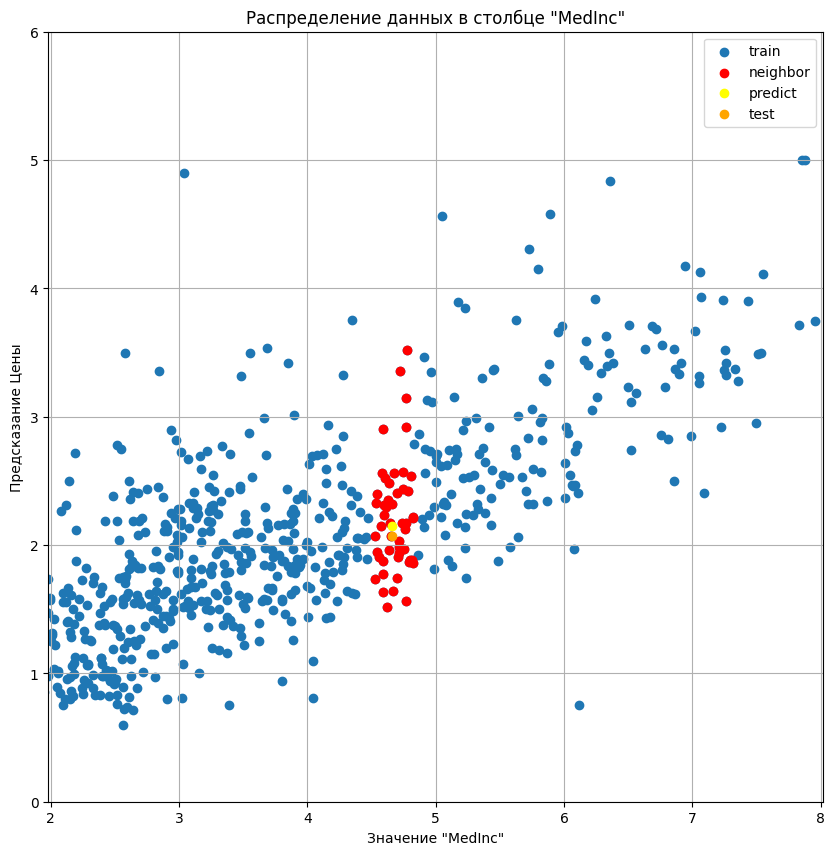

In [163]:
# Ваш код здесь

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.scatter(X_train, y_train, label ='train')
plt.scatter(X_train.loc[neighbors.index],y_train.loc[neighbors.index],
            color = 'red' , label = 'neighbor')
plt.scatter(X_test.loc[random_test_sample.index[0]],prediction, color= 'yellow', label = 'predict')
plt.scatter(X_test.loc[random_test_sample.index[0]],y_test.loc[random_test_sample.index[0]], color= 'orange', label = 'test')

plt.axis( 'equal')
plt.title('Распределение данных в столбце "MedInc"')
plt.legend()
plt.axis([4, 6, 0, 6])
plt.grid()
plt.xlabel('Значение "MedInc"')
plt.ylabel('Предсказание Цены')

## 6. Еще одна задача регрессии

### Получение данных

Будем работать с тем же самым набором данным `fetch_olivetti_faces` из `sklearn`, но уже для задачи регрессии - будем восстанавливать изображение.

In [164]:
from sklearn.model_selection import train_test_split

data, _ = fetch_olivetti_faces(return_X_y=True)
train, test = train_test_split(data, test_size=0.2, random_state=4)

Поделим данные на X и y, где X - это верхняя часть лица человека, на этом модель будет обучаться, а y - это нижняя часть лица человека - её будем предсказывать.

In [165]:
n_pixels = data.shape[1]

# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2]
# Lower half of the faces
y_train = train[:, n_pixels // 2:]


X_test = test[:, :(n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2:]

Вот один пример обучающей пары.

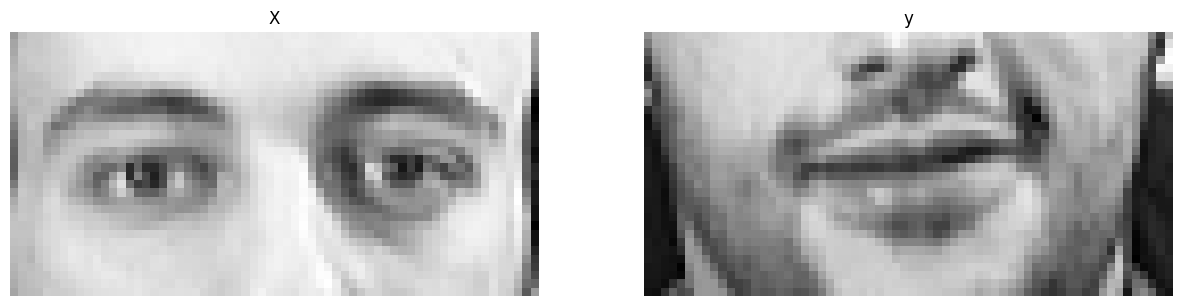

In [166]:
import matplotlib.pyplot as plt

idx = 0

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].imshow(X_train[idx].reshape((32, 64)), cmap='gray')
ax[0].set_title('X')
ax[1].imshow(y_train[idx].reshape((32, 64)), cmap='gray')
ax[1].set_title('y')
ax[0].axis('off')
ax[1].axis('off')

plt.show()

#### 6.1. Обучите модель KNN и назовите переменную с моделью knn на 100 соседях

In [167]:
# Ваш код здесь
knn = KNeighborsRegressor(n_neighbors=100)

knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=100)

#### 6.2. Проверьте качество работы модели

При этом предсказания модели запишите в словарь pred_test с ключом knn.


In [168]:
pred_test = {'knn': None,
             'weighted_knn': None,
             'weighted_knn_custom': None}

In [169]:
# Ваш код здесь
pred_knn = knn.predict(X_test)

In [170]:
from sklearn.metrics import r2_score #коэффициент детерминации (R2 = 1 - (mse_model / mse_mean) )

r2_score(pred_knn, y_test)

-11.693276577608428

#### 6.3. Обучите модель KNN с весами по дистанции и назовите переменную с моделью weighted_knn на 100 соседях

In [171]:
# Ваш код здесь

knn_weighted = KNeighborsRegressor(n_neighbors=100, weights='distance')

knn_weighted.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=100, weights='distance')

#### 6.4. Проверьте качество работы модели

При этом предсказания модели запишите в словарь pred_test с ключом weighted_knn.


In [172]:
# Ваш код здесь
pred_weighted_knn = knn_weighted.predict(X_test)

In [173]:
from sklearn.metrics import r2_score #коэффициент детерминации (R2 = 1 - (mse_model / mse_mean) )

r2_score(pred_weighted_knn, y_test)

-9.723678421559578

#### 6.5. Напишите свою функцию подсчета весов по дистанции

(Можете выбрать любой подход)


In [174]:
# Ваш код здесь

def calculate_distance_weights(distances):

    distances = np.where(distances == 0, 1e-6, distances)

    weights = 1.0 / distances

    return weights

#### 6.6. Обучите модель KNN с кастомными весами по дистанции и назовите переменную с моделью weighted_knn_custom на 100 соседях

In [177]:
from sklearn.neighbors import KNeighborsRegressor
knn_custom = KNeighborsRegressor(n_neighbors=100, weights=calculate_distance_weights)

knn_custom.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=100,
                    weights=<function calculate_distance_weights at 0x7c8831d35f30>)

#### 6.7. Проверьте качество работы модели

При этом предсказания модели запишите в словарь pred_test с ключом weighted_knn_custom.


In [178]:
# Ваш код здесь
pred_custom_weighted_knn = knn_custom.predict(X_test)

In [179]:

from sklearn.metrics import r2_score #коэффициент детерминации (R2 = 1 - (mse_model / mse_mean) )

r2_score(pred_custom_weighted_knn, y_test)

-9.723678421559578

А сейчас отрисуем все предсказания.

In [181]:
pred_test = {'knn': pred_knn,
             'weighted_knn': pred_weighted_knn,
             'weighted_knn_custom': pred_custom_weighted_knn}

In [182]:
ESTIMATORS = pred_test

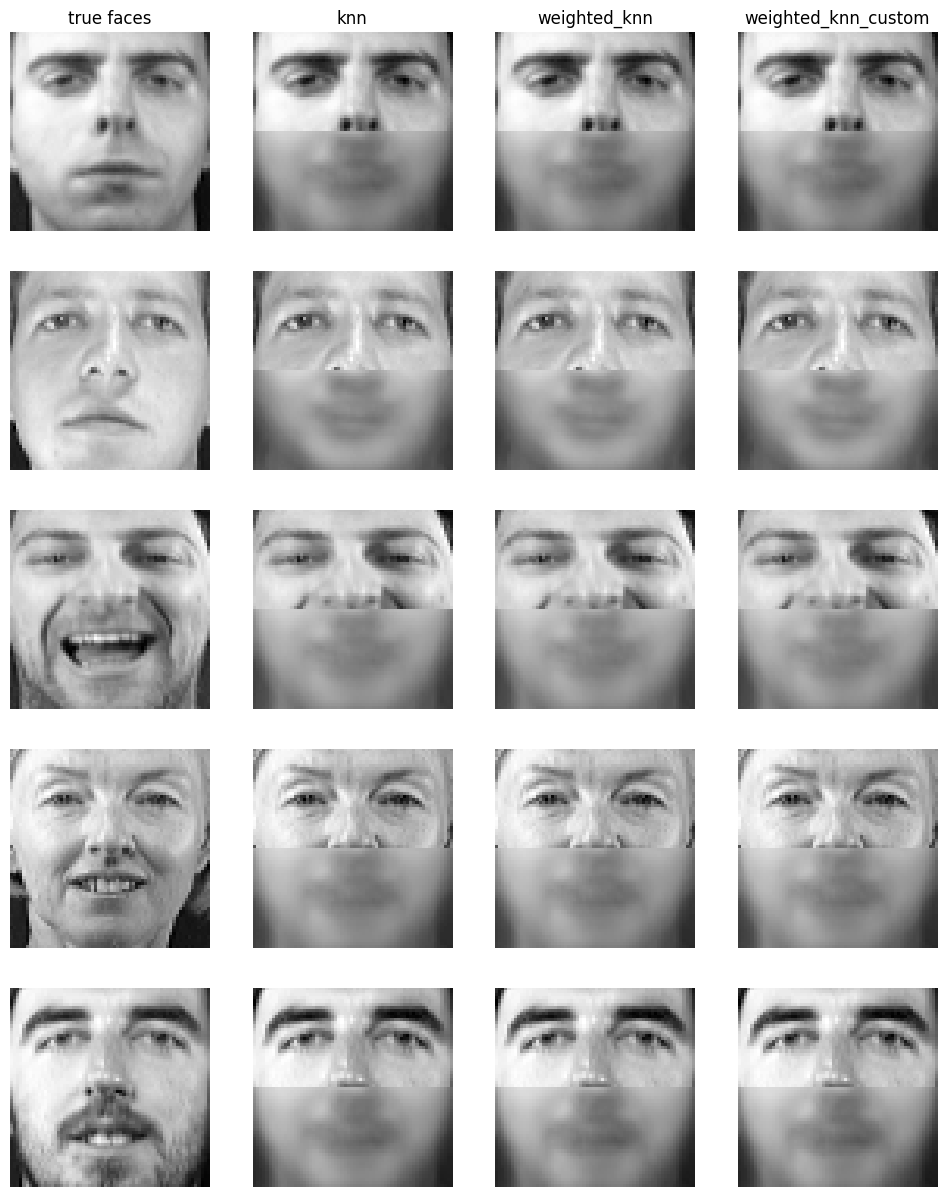

In [183]:
n_faces = 5
n_cols = 1 + len(ESTIMATORS)
image_shape = (64, 64)
plt.figure(figsize=(3 * n_cols, 3 * n_faces))


for i in range(5):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], pred_test[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)

        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j, title=est)

        sub.axis("off")
        sub.imshow(
            completed_face.reshape(image_shape),
            cmap=plt.cm.gray,
            interpolation="nearest",
        )

#### 7*. Подберите лучшие гиперпараметры для модели, используя метод [GridSearchCV](https://scikit-learn.org/stable/modules/grid_search.html)

Примеры использования можно найти в технической документации, а также в следующих источниках:

[Пример 1](https://machinelearningknowledge.ai/knn-classifier-in-sklearn-using-gridsearchcv-with-example/#vii_Model_fitting_with_K-cross_Validation_and_GridSearchCV)


[Пример 2](https://vc.ru/ml/147132-kak-avtomaticheski-podobrat-parametry-dlya-modeli-mashinnogo-obucheniya-ispolzuem-gridsearchcv)

In [184]:
# Ваш код здесь
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [4, 7, 5, 12],
    'weights': ['uniform', 'distance'],
}

knn = KNeighborsRegressor()

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [185]:
best_model_predict = best_model.predict(X_test)

In [186]:
r2_score(best_model_predict, y_test)

0.15033882088341421

In [187]:
ESTIMATORS = {'knn': pred_knn,
             'weighted_knn': pred_weighted_knn,
             'weighted_knn_custom': pred_custom_weighted_knn,
             'best_model': best_model_predict
             }

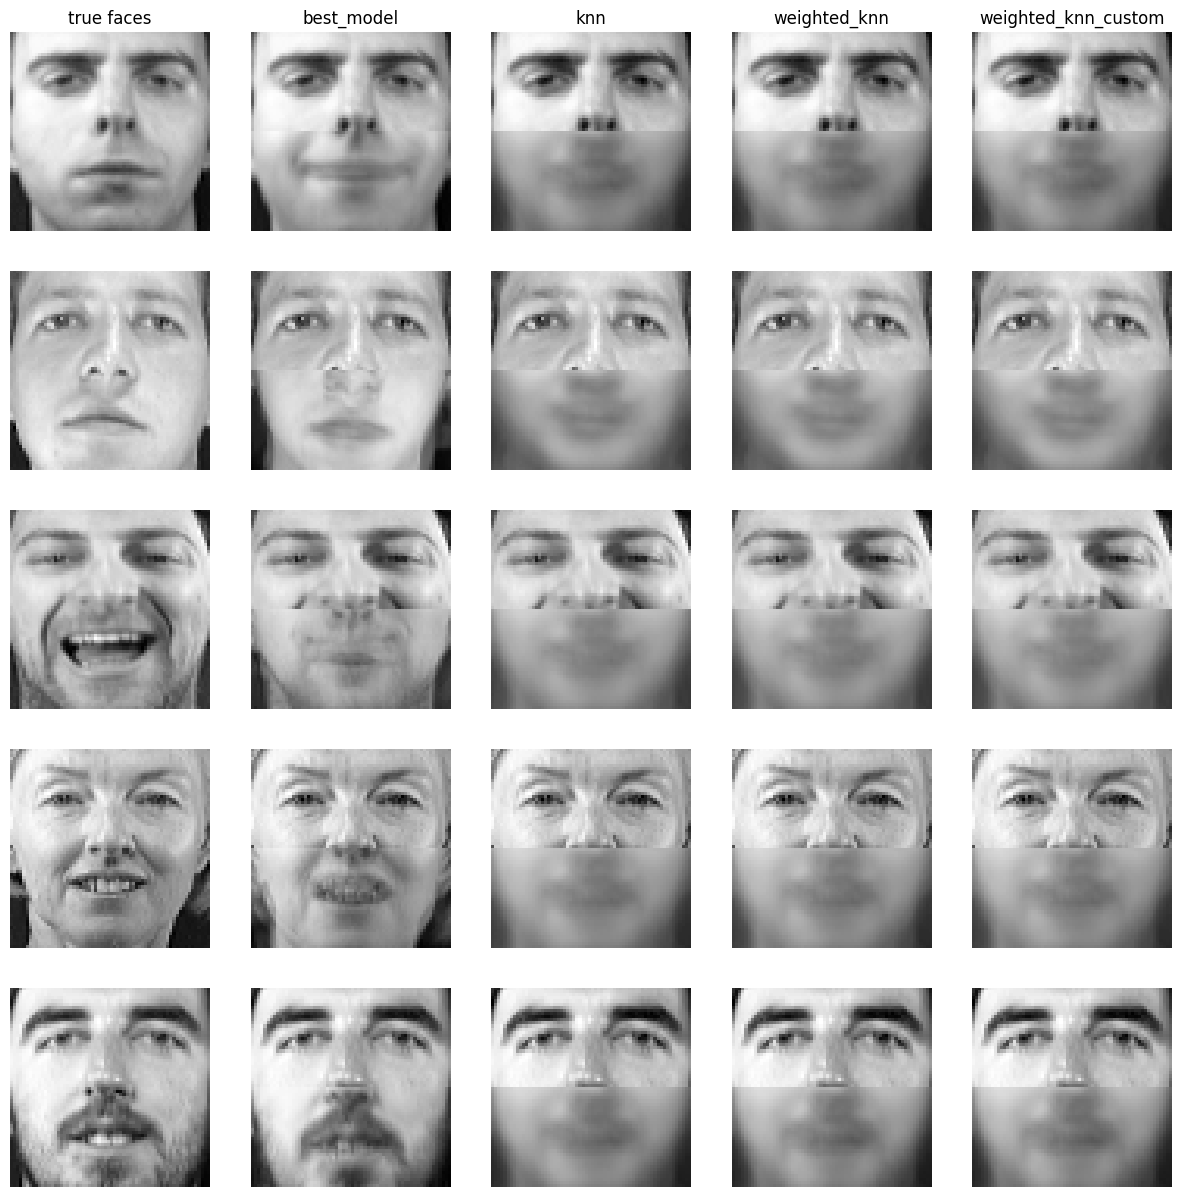

In [190]:
n_faces = 5
n_cols = 1 + len(ESTIMATORS)
image_shape = (64, 64)
plt.figure(figsize=(3 * n_cols, 3 * n_faces))


for i in range(5):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], ESTIMATORS[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)

        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j, title=est)

        sub.axis("off")
        sub.imshow(
            completed_face.reshape(image_shape),
            cmap=plt.cm.gray,
            interpolation="nearest",
        )